
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [81]:

import numpy as np
import matplotlib.pyplot as plt


In [82]:
np.random.seed(1)

X = np.random.rand(120, 2)
y = 4 * X[:, 0]**2 + 2 * X[:, 1] + np.random.randn(120) * 0.2


In [83]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [84]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.W) + self.b
            error = y_pred - y

            loss = (1/(2*n_samples)) * np.sum(error**2) + \
                   (self.l2_lambda/2) * np.sum(self.W**2)
            self.losses.append(loss)

            dW = (1/n_samples) * np.dot(X.T, error) + self.l2_lambda * self.W
            db = (1/n_samples) * np.sum(error)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b



In [85]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [86]:
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


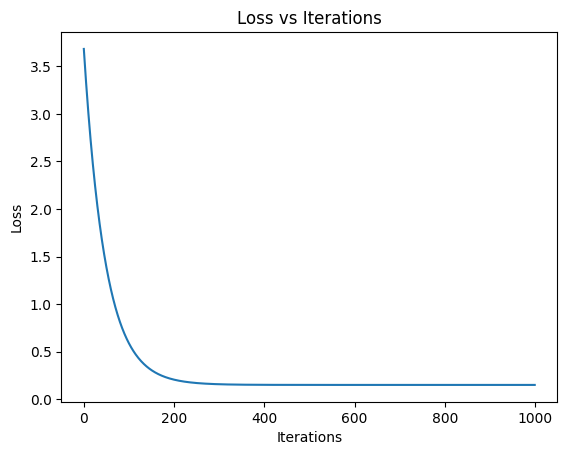

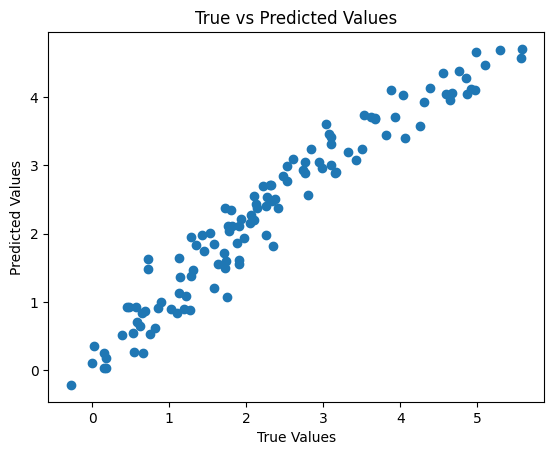

In [87]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [88]:
import numpy as np
import matplotlib.pyplot as plt


In [89]:
np.random.seed(3)

X = np.random.rand(150, 2)
center = np.array([0.5, 0.5])
y = (np.linalg.norm(X - center, axis=1) < 0.3).astype(int)


In [90]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [91]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.W) + self.b
            y_pred = self.sigmoid(linear)

            # Binary Cross Entropy Loss + L2
            loss = (-1/n_samples) * np.sum(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            ) + (self.l2_lambda / 2) * np.sum(self.W ** 2)

            self.losses.append(loss)

            # Gradients
            dW = (1/n_samples) * np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.W
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.W) + self.b
        probs = self.sigmoid(linear)
        return


In [92]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [93]:
model = LogisticRegressionScratch(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


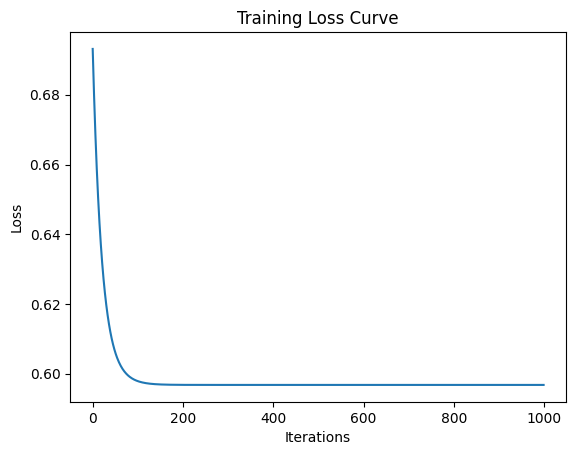

In [94]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [95]:
import numpy as np


In [96]:
np.random.seed(4)

M = np.random.rand(10, 10)
k = 5
                     # number of clusters


In [97]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    rows, cols = M.shape
    
    # Flatten matrix (cluster individual elements)
    X = M.reshape(-1, 1)
    
    # Initialize random centroids
    centroids = np.random.choice(X.flatten(), k, replace=False)
    
    for _ in range(max_iters):
        # Compute distances and assign clusters
        distances = np.abs(X - centroids.reshape(1, -1))
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = []
        for i in range(k):
            if np.any(labels == i):
                new_centroids.append(np.mean(X[labels == i]))
            else:
                new_centroids.append(centroids[i])
        
        new_centroids = np.array(new_centroids)
        
        # Check convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    # Reshape labels back to matrix shape
    assignment_table = labels.reshape(rows, cols)
    
    # Create cookbook
    cookbook = {}
    for i in range(k):
        cookbook[i] = list(zip(*np.where(assignment_table == i)))
    
    return assignment_table, cookbook, centroids



In [98]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [99]:
print("Original Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for key in cookbook:
    print(f"Cluster {key}:", cookbook[key])


Original Matrix M:
 [[0.96702984 0.54723225 0.97268436 0.71481599 0.69772882 0.2160895
  0.97627445 0.00623026 0.25298236 0.43479153]
 [0.77938292 0.19768507 0.86299324 0.98340068 0.16384224 0.59733394
  0.0089861  0.38657128 0.04416006 0.95665297]
 [0.43614665 0.94897731 0.78630599 0.8662893  0.17316542 0.07494859
  0.60074272 0.16797218 0.73338017 0.40844386]
 [0.52790882 0.93757158 0.52169612 0.10819338 0.15822341 0.54520265
  0.52440408 0.63761024 0.40149544 0.64980511]
 [0.3969     0.62391611 0.76740497 0.17897391 0.37557577 0.50253306
  0.68666708 0.25367965 0.55474086 0.62493084]
 [0.89550117 0.36285359 0.63755707 0.1914464  0.49779411 0.1824454
  0.91838304 0.43182207 0.8301881  0.4167763 ]
 [0.90466759 0.40482522 0.3311745  0.57213877 0.84544365 0.86101431
  0.59568812 0.08466161 0.59726661 0.24545371]
 [0.73259345 0.89465129 0.51473397 0.60356351 0.06506781 0.54007473
  0.12918678 0.61456285 0.36365035 0.76775803]
 [0.04853414 0.10981812 0.68402322 0.5146537  0.57164137 0.843


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
